Hunter Bennett | Glass Lab | Kupffer Strains Project | 03 Feb 2021  


In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [2]:
dataDirectory = '/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control'
workingDirectory = '/home/h1bennet/strains/results/00_Strains_Control_ATAC/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [3]:
qc = ngs_qc(dataDirectory, 'atac')

/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control/
./control_qc/


<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction
00_NCoRWT_Kupffer_ATAC_control_young_LN12aM_JSS_150812,12134342.0,131.0,0.005059,1.136,-1.000000e+00,21893797.0,14735473.0,6846309.0,312015.0,0.673043,0.985749
00_NCoRWT_Kupffer_ATAC_control_young_NNaF_JSS_150811,11042244.0,141.0,0.004720,1.165,-1.000000e+00,21202476.0,14234990.0,6721118.0,246368.0,0.671383,0.988380
01_balbc_Kupffer_ATAC_control_young_balb10A_TDT_JSS_20161013,8207989.0,50.0,0.004177,1.385,2.722428e+09,14885694.0,10205958.0,4427211.0,252525.0,0.685622,0.983036
01_balbc_Kupffer_ATAC_control_young_balb10B_TDT_JSS_20161013,6162396.0,71.0,0.004554,2.012,2.722426e+09,16679204.0,11026947.0,5388661.0,263596.0,0.661119,0.984196
01_balbc_Kupffer_ATAC_control_young_balb10C_TDT_JSS_20161013,8183358.0,51.0,0.004359,1.450,2.722426e+09,15651344.0,10638146.0,4735837.0,277361.0,0.679695,0.982279
02_aj_Kupffer_ATAC_control_young_aj10A_TDT_JSS_20161013,7116976.0,57.0,0.003874,1.482,-1.000000e+00,15494123.0,10576519.0,3832827.0,1084777.0,0.682615,0.929988
02_aj_Kupffer_ATAC_control_young_aj10B_TDT_JSS_20161013,5337418.0,56.0,0.002723,1.389,-1.000000e+00,14591079.0,8649874.0,2995294.0,2945911.0,0.592819,0.798102
02_aj_Kupffer_ATAC_control_young_aj10C_TDT_JSS_20161013,4793622.0,54.0,0.002775,1.576,-1.000000e+00,14980212.0,8822754.0,3286242.0,2871216.0,0.588961,0.808333


Balbc and AJ are undersequenced compared to C57 - this could effect downstream differential peak calling although we don't use that for much in this case

### Plot tag count distribution

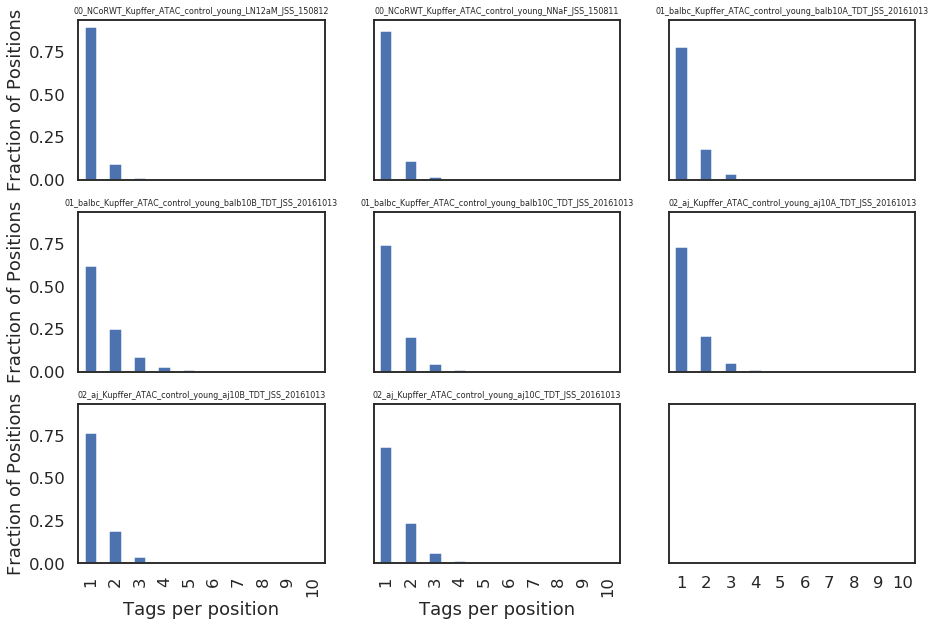

In [5]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(3,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|



In [6]:
# makeMultiWigHub.pl hrb_strains_atac_control_young mm10 -force -color \
# 77,175,74 77,175,74 \
# 55,126,184 55,126,184 55,126,184 \
# 228,26,28 228,26,28 228,26,28 \
# -d /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control/*

# Call Peaks

In [7]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./atac_peak_files/ ]; then mkdir ./atac_peak_files; fi

In [8]:
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        find_peaks_idr = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-L', '0', '-C', '0', '-fdr', '0.9', '-style',
                          'factor', '-size', '200', '>',
                          workingDirectory + '/atac_peak_files/' + tagdir + '_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                      '-style', 'factor', '-size', '200', '>',
                      workingDirectory + '/atac_peak_files/' + tagdir + '_default_peaks.tsv',
                      '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_idr))
        f.write(' '.join(find_peaks))
f.close()

### compile peak stats for QC

In [9]:
peak_stats={}

for td in os.listdir('./atac_peak_files/'):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./atac_peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [10]:
df.sort_index(inplace=True)

### Save to file

In [16]:
!ls

annotatePeaks_homer.sh	differential_peaks  mergePeaks_homer.sh
atac_idr		figures		    motif_calling
atac_peak_files		idr_peaks	    peakCalling_homer.sh
bed_files_ucsc		idr_peak_table.txt  run_idr.sh
control_qc		maggie_output	    runMaggie.sh
default_peak_table.txt	merged_peaks
differential_fasta	merged_tagdirs


In [15]:
df.loc[df.index.str.contains('default'), :].to_csv('./default_peak_table.txt', sep='\t')
df.loc[~df.index.str.contains('default'), :].to_csv('./idr_peak_table.txt', sep='\t')

In [12]:
df.loc[df.index.str.contains('default'), :]

,total_peaks,ip_eff,peaks_filt_input,peaks_filt_local,peaks_filt_clonal
00_NCoRWT_Kupffer_ATAC_control_young_LN12aM_JSS_150812_default_peaks.tsv,43972.0,11.38,0.0,10309.0,28.0
00_NCoRWT_Kupffer_ATAC_control_young_NNaF_JSS_150811_default_peaks.tsv,49840.0,13.90,0.0,12054.0,28.0
01_balbc_Kupffer_ATAC_control_young_balb10A_TDT_JSS_20161013_default_peaks.tsv,27016.0,6.13,0.0,3527.0,42.0
01_balbc_Kupffer_ATAC_control_young_balb10B_TDT_JSS_20161013_default_peaks.tsv,43612.0,14.94,0.0,5777.0,26.0
01_balbc_Kupffer_ATAC_control_young_balb10C_TDT_JSS_20161013_default_peaks.tsv,22752.0,4.96,0.0,3633.0,41.0
02_aj_Kupffer_ATAC_control_young_aj10A_TDT_JSS_20161013_default_peaks.tsv,31627.0,8.89,0.0,5872.0,21.0
02_aj_Kupffer_ATAC_control_young_aj10B_TDT_JSS_20161013_default_peaks.tsv,20238.0,5.81,0.0,1828.0,20.0
02_aj_Kupffer_ATAC_control_young_aj10C_TDT_JSS_20161013_default_peaks.tsv,19243.0,5.04,0.0,1589.0,20.0
